# Use of Force Analysis in the Seattle Police Departament

In [157]:
import pandas as pd
import numpy as np

In [158]:
df = pd.read_csv('use-of-force.csv')

Getting to know our dataset!

In [159]:
df.sample(10)

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
4022,8753-1750-6704,8753,Level 1 - Use of Force,2015-12-06T01:45:00,W,K,K1,1750,6704,White,Female
7219,17424-1141-13907,17424,Level 1 - Use of Force,2017-09-19T13:17:00,E,G,G2,1141,13907,Black or African American,Male
5296,16125-1264-12808,16125,Level 2 - Use of Force,2017-06-18T02:20:00,S,O,O1,1264,12808,American Indian/Alaska Native,Female
5279,18043-1547-5510,18043,Level 1 - Use of Force,2017-11-02T00:49:00,SW,W,W1,1547,5510,NaN,Male
5975,12226-1770-4166,12226,Level 1 - Use of Force,2016-08-14T02:40:00,S,S,S2,1770,4166,NaN,Female
4592,10217-1233-2393,10217,Level 1 - Use of Force,2016-03-19T11:31:00,SW,W,W1,1233,2393,White,Male
7072,23242-2199-16042,23242,Level 1 - Use of Force,2018-03-30T13:47:00,NaN,-,NaN,2199,16042,Nat Hawaiian/Oth Pac Islander,Female
7989,24259-2459-16201,24259,Level 1 - Use of Force,2018-04-14T18:03:00,NaN,-,NaN,2459,16201,White,Male
4076,8990-1762-6832,8990,Level 1 - Use of Force,2015-12-18T21:26:00,E,G,G2,1762,6832,NaN,Female
2011,4188-1583-3677,4188,Level 1 - Use of Force,2015-03-13T18:10:00,N,B,B3,1583,3677,NaN,Male


In [160]:
df.nunique()

ID                   8061
Incident_Num         7593
Incident_Type           2
Occured_date_time    5981
Precinct                6
Sector                 20
Beat                   53
Officer_ID           1064
Subject_ID           4631
Subject_Race            6
Subject_Gender          2
dtype: int64

The number of Officer_ID's is significantly lower than then the number of Incidents, which means one Officer must be arresting more than one subject per Incident.
The same goes for Subject_ID's, the same subject must have been arrested one or more times.

Let's check this out!

In [161]:
Num_subjects_involved_Incident = df['Incident_Num'].value_counts()
Num_subjects_involved_Incident

14888    9
2124     6
16889    6
8984     6
2125     6
        ..
10784    1
14882    1
18980    1
4647     1
2049     1
Name: Incident_Num, Length: 7593, dtype: int64

As we can see some Incidents have more than one subject been arrested, confirming our hypothesis. 

Now can create a column in the dataset to incorporatate that.

In [162]:
df['Num_subjects_involved'] = df['Incident_Num'].map(Num_subjects_involved_Incident)

In [163]:
df.sort_values(by=['Num_subjects_involved'], ascending=False).head(25)

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,Num_subjects_involved
4681,14888-2211-12074,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12074,NaN,Male,9
4678,14888-2211-12071,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12071,White,Female,9
4687,14888-2211-4645,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,4645,NaN,Male,9
4686,14888-2211-8841,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,8841,Black or African American,Female,9
4684,14888-2211-12067,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12067,NaN,Male,9
4682,14888-2211-12075,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12075,NaN,Male,9
4677,14888-2211-12068,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12068,NaN,Female,9
4680,14888-2211-12073,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12073,NaN,Male,9
4679,14888-2211-12072,14888,Level 1 - Use of Force,2017-03-18T16:39:00,E,G,G1,2211,12072,White,Male,9
2617,16889-828-13501,16889,Level 2 - Use of Force,2017-08-13T14:35:00,W,M,M1,828,13501,NaN,NaN,6


To better vizualize how many subjects we have per Incident, we are going to reorder the dataset columns and put Number of subjects involved in the incident right after the Incident_Num.

We are also going to drop the ID column, which is a mere mix of 3 other columns [Incident_Num, Officer_ID, Subject_ID] and change the name of the column ['Incident_Type'] to ['Level_of_Force'] for a more explict understading.

In [164]:
df.columns

Index(['ID', 'Incident_Num', 'Incident_Type', 'Occured_date_time', 'Precinct',
       'Sector', 'Beat', 'Officer_ID', 'Subject_ID', 'Subject_Race',
       'Subject_Gender', 'Num_subjects_involved'],
      dtype='object')

In [165]:
df = df.rename(columns = {'Incident_Type': 'Level_of_Force'})

In [166]:
df= df[['Incident_Num','Num_subjects_involved', 'Level_of_Force', 'Occured_date_time', 'Precinct',
       'Sector', 'Beat', 'Officer_ID', 'Subject_ID', 'Subject_Race',
       'Subject_Gender']]

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Incident_Num           8061 non-null   int64 
 1   Num_subjects_involved  8061 non-null   int64 
 2   Level_of_Force         8061 non-null   object
 3   Occured_date_time      8061 non-null   object
 4   Precinct               7454 non-null   object
 5   Sector                 8061 non-null   object
 6   Beat                   7454 non-null   object
 7   Officer_ID             8061 non-null   int64 
 8   Subject_ID             8061 non-null   int64 
 9   Subject_Race           6730 non-null   object
 10  Subject_Gender         7866 non-null   object
dtypes: int64(4), object(7)
memory usage: 692.9+ KB


The 'Level of Force' column is a string. We need to convert it to an integer so we can use later on our calculations.

In [168]:
df['Level_of_Force'] = df['Level_of_Force'].apply(lambda x: x.strip('Level').strip().split('-')[0])
df['Level_of_Force'] = df['Level_of_Force'].astype(int)

The 'Occured_date_time' column is also a string. We need to convert it to a format where the computer can read it as a DateTime.

In conjuction with this conversion we are going to create separate columns for each of its values.

In [169]:
import datetime as dt
df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time']) 
df['Hour'] = df['Occured_date_time'].apply(lambda time: time.hour)
df['Month'] = df['Occured_date_time'].apply(lambda time: time.month)
df['Year'] = df['Occured_date_time'].apply(lambda time: time.year)
df['Day of Week'] = df['Occured_date_time'].apply(lambda time: time.dayofweek)
df['Year_month'] = df['Occured_date_time'].dt.strftime('%Y-%m')
#df['Year_month'] = pd.to_datetime(df['Occured_date_time']).dt.to_period('M')
#df['date'] = pd.to_datetime(df['Occured_date_time']).dt.date

In [170]:
Num_Incidents_Officer_involved = df['Officer_ID'].value_counts().sort_values(ascending=False)
df['Num_Incidents_Officer_involved'] = df['Officer_ID'].map(Num_Incidents_Officer_involved ) 
Num_Incidents_Subject_involved = df['Subject_ID'].value_counts().sort_values(ascending=False)
df['Num_Incidents_Subject_involved'] = df['Subject_ID'].map(Num_Incidents_Subject_involved )

In [171]:
df['Same_Officer_Subject'] = df['Subject_ID'].apply(lambda x: 1 if df[df['Subject_ID'] == x].duplicated(subset=['Officer_ID']).any() else 0)

In [172]:
df.head()

,Incident_Num,Num_subjects_involved,Level_of_Force,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,Hour,Month,Year,Day of Week,Year_month,Num_Incidents_Officer_involved,Num_Incidents_Subject_involved,Same_Officer_Subject
0,18412,1,1,2017-11-28 01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female,1,11,2017,1,2017-11,9,1,0
1,16162,1,1,2017-06-22 04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male,4,6,2017,3,2017-06,4,6,0
2,15041,1,1,2017-03-30 15:59:00,NaN,-,NaN,2017,12130,White,Male,15,3,2017,3,2017-03,21,1,0
3,29139,1,1,2018-02-15 13:06:00,NaN,-,NaN,4759,15571,Black or African American,Male,13,2,2018,3,2018-02,5,5,1
4,30425,1,1,2018-07-17 21:00:00,NaN,-,NaN,4745,16299,White,Female,21,7,2018,1,2018-07,2,8,1


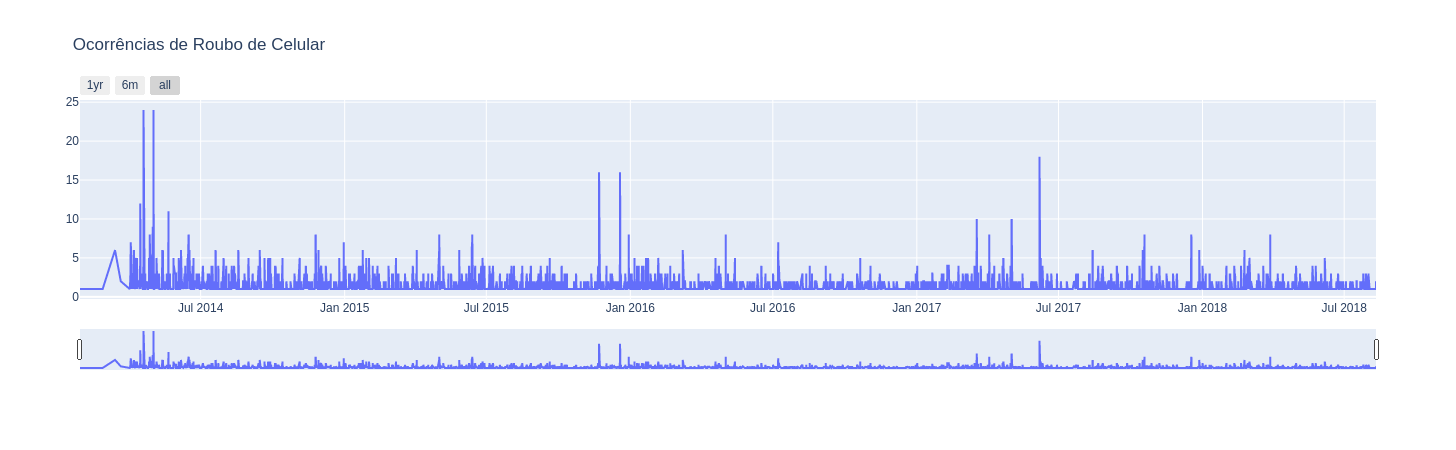

In [173]:
import plotly.graph_objs as go
import plotly.offline as py 
df_ts = df.groupby('Occured_date_time').count()["Year"].to_frame().rename(columns={"Year": "Incidents"})

trace = [go.Scatter(x = df_ts.index, y = df_ts.Incidents)]

layout = dict(
    title='Ocorrências de Roubo de Celular',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
fig = dict(data=trace, layout=layout)
py.iplot(fig)

We have some peaks in the graph which indicate much higher rates of incidents than normal. This is a bit suspicious, let's investigate that.

In [174]:
media = df.groupby('Occured_date_time').count() ["Year"].to_frame().sort_values(by='Year',ascending=False)
media['Year'].mean()

1.3477679317839826

The average of Incidents for the dataset is of around 1.3 incidents per day. We can check out the days of these peaks to find out what is going on.

In [175]:
averages = df[(df.Month == 5) & (df.Year == 2014) & (df.Subject_ID == 1708)]

In [176]:
averages.sort_values('Occured_date_time', ascending=True).head(10)

,Incident_Num,Num_subjects_involved,Level_of_Force,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,Hour,Month,Year,Day of Week,Year_month,Num_Incidents_Officer_involved,Num_Incidents_Subject_involved,Same_Officer_Subject
686,1831,1,1,2014-05-01 19:20:00,E,E,E2,1707,1708,NaN,NaN,19,5,2014,3,2014-05,19,69,1
687,1825,1,1,2014-05-01 19:20:00,E,E,E2,1558,1708,NaN,NaN,19,5,2014,3,2014-05,2,69,1
688,1810,1,1,2014-05-01 19:20:00,E,E,E2,769,1708,NaN,NaN,19,5,2014,3,2014-05,8,69,1
691,1788,1,1,2014-05-01 19:20:00,E,E,E2,1690,1708,NaN,NaN,19,5,2014,3,2014-05,18,69,1
692,1845,1,1,2014-05-01 19:20:00,E,E,E2,1599,1708,NaN,NaN,19,5,2014,3,2014-05,14,69,1
693,1840,1,1,2014-05-01 19:20:00,E,E,E2,1741,1708,NaN,NaN,19,5,2014,3,2014-05,14,69,1
1209,1829,1,1,2014-05-01 19:48:00,W,M,M2,1634,1708,NaN,NaN,19,5,2014,3,2014-05,29,69,1
121,1974,1,1,2014-05-01 20:40:00,W,D,D2,1233,1708,NaN,NaN,20,5,2014,3,2014-05,9,69,1
1285,1976,1,1,2014-05-01 20:40:00,W,D,D2,1685,1708,NaN,NaN,20,5,2014,3,2014-05,13,69,1
1286,1977,1,1,2014-05-01 20:40:00,W,D,D2,1181,1708,NaN,NaN,20,5,2014,3,2014-05,3,69,1


We can see that different Officers created different Incident Numbers for the same Subject at the same time. The Seattle Police Deparment probably has a reason for this type of multiple input 
but for our statistical purposes is not beneficial to have the same subject repeated more than once at the same moment so we are going to drop these entrances.

Also, in some analysis is better to have unique Incident Numbers so that we on don't end up thinking we have more incidents than we actually have in reality.
For these cases we are going to create a separate dataset called 'df2' in we which drop ['Incident_Num'] duplicates.

In [177]:
df2 = df.drop_duplicates(subset = ["Incident_Num"])

In [178]:
df3 = df2.drop_duplicates(subset=['Occured_date_time', 'Subject_ID'])
print(len(df))
print(len(df2))
print(len(df3))

8061
7593
6317


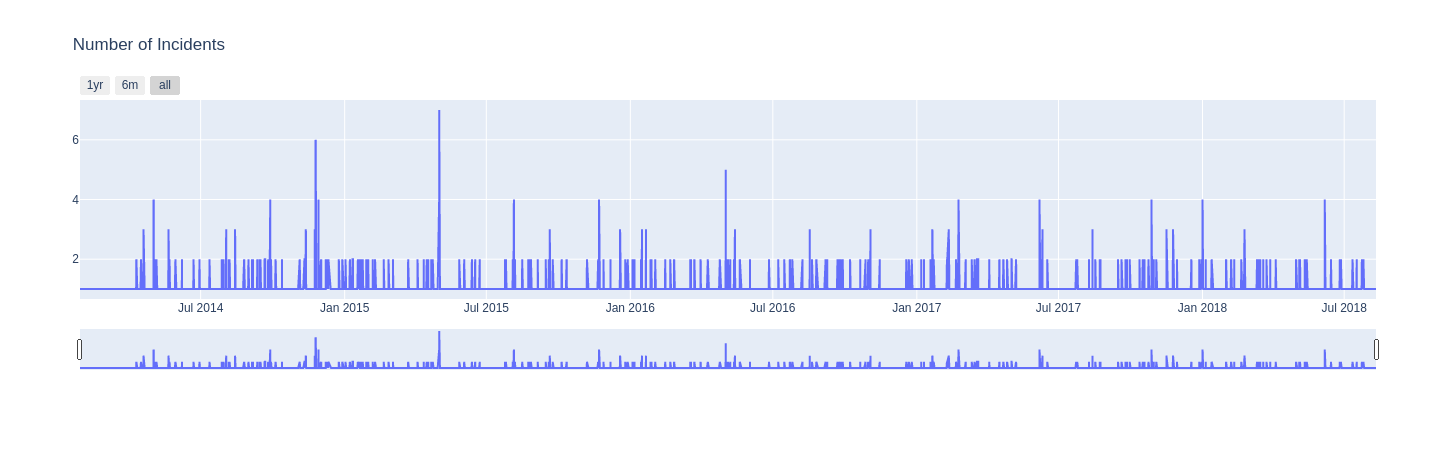

In [179]:
df_ts = df3.groupby('Occured_date_time').count()["Year"].to_frame().rename(columns={"Year": "OCORRENCIAS"})

trace = [go.Scatter(x = df_ts.index, y = df_ts.OCORRENCIAS)]

layout = dict(
    title='Number of Incidents',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

Now to starting answering some questions we are going to divide the dataset by Level of Use of Force.

In [180]:
level1 = df3[df3['Level_of_Force'] == 1]
level2 = df3[df3['Level_of_Force'] == 2]

A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente violentos. No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz de elencar os policiais em ordem decrescente de chance de violência excessiva com base no número de incidentes dos quais eles participaram.

In [181]:
o1 = df3['Officer_ID'].value_counts().to_frame().sort_values(by='Officer_ID', ascending=False)
o1 = o1.reset_index()
o1 = o1.rename(columns = {'index': 'Officer_ID', 'Officer_ID': 'Num_Incidents'}, inplace = False)
o2 =o1.head(10)
o2

,Officer_ID,Num_Incidents
0,456,63
1,1750,37
2,1775,36
3,1697,36
4,1773,34
5,1559,34
6,1807,33
7,1735,31
8,1792,30
9,1899,29


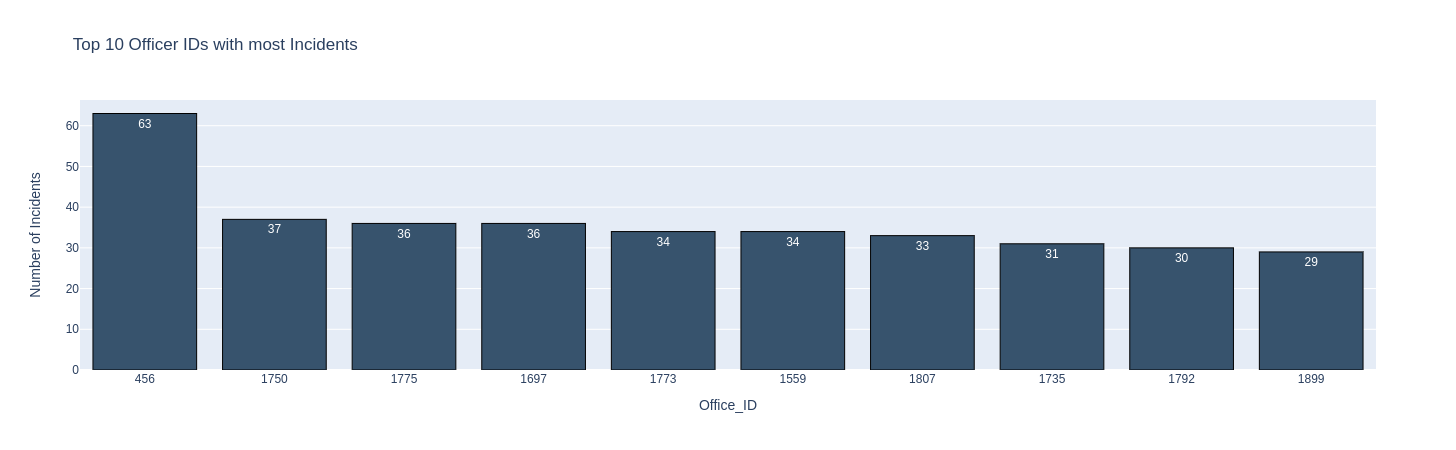

In [182]:
indice =  o2.Officer_ID

y1 = o2.Num_Incidents


fig = go.Figure()
fig.add_trace(go.Bar(
    x=indice,
    y=y1,
    name='Level of Force 1',
    marker=dict(color='rgb(55, 83, 109)', 
               line=dict(color='#000000', width=1)),
    #marker_color= 'rgb(55, 83, 109)',    
    text=y1,
    textposition='auto',
))

'''
fig.add_trace(go.Bar(
    x=indice,
    y= y2,
    name='Level of Force 2',marker=dict(color='rgb(26, 118, 255)', 
               line=dict(color='#000000', width=1)), 
    #marker_color= 'rgb(26, 118, 255)',
    text=y2,
    textposition='auto',
    
))'''

fig.update_layout(
    title_text="Top 10 Officer IDs with most Incidents", # title of plot
    #yaxis_title_text='Num_Incidents', # yaxis label
    #yaxis = {'title': f'{a}}, 
    #bargap=0.15, # gap between bars of adjacent location coordinates
    #bargroupgap=0.05 # gap between bars of the same location coordinates
    #barmode='stack', 
    xaxis={'type': 'category', 'title': 'Office_ID'},
    #xaxis_tickangle=0, # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    
    yaxis = dict(
        title='Number of Incidents',
        
    ),
)

fig.show()

This column shows if a subject has been arrested more than once by any Officer ( 0 = No , 1 = Yes ). Been arrested multiple times by the same Officer may indicate some type persecution.

In [183]:
pd.options.mode.chained_assignment = None  # default='warn'
df3['Same_Officer_Subject'] = df3['Subject_ID'].apply(lambda x: 1 if df[df['Subject_ID'] == x].duplicated(subset=['Officer_ID']).any() else 0)

Number of individuals arrested more than once by the same Officer.

In [184]:
len(df3[df3['Same_Officer_Subject'] == 1])

236

Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes "Level 2" calculado na questão 1. Que interpretação pode ser dada a este resultado?

In [185]:
s1 = df3['Subject_ID'].value_counts().to_frame().sort_values(by='Subject_ID', ascending=False)
s1 = s1.reset_index()
s1 = s1.rename(columns = {'index': 'Subject_ID', 'Subject_ID': 'Num_Incidents'}, inplace = False)
s2 =s1.head(10)
s2

,Subject_ID,Num_Incidents
0,3576,14
1,8561,13
2,1708,13
3,7746,12
4,499,10
5,1459,10
6,1020,10
7,323,10
8,586,9
9,3061,8


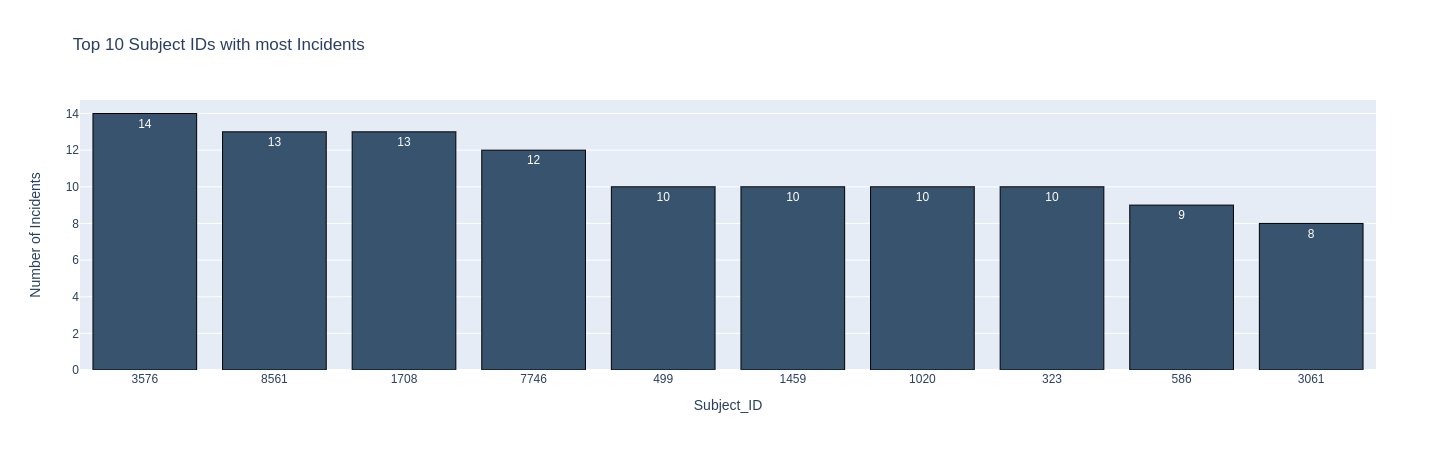

In [186]:
indice =  s2.Subject_ID

y1 = s2.Num_Incidents


fig = go.Figure()
fig.add_trace(go.Bar(
    x=indice,
    y=y1,
    name='Level of Force 1',
    marker=dict(color='rgb(55, 83, 109)', 
               line=dict(color='#000000', width=1)),
    #marker_color= 'rgb(55, 83, 109)',    
    text=y1,
    textposition='auto',
))

'''
fig.add_trace(go.Bar(
    x=indice,
    y= y2,
    name='Level of Force 2',marker=dict(color='rgb(26, 118, 255)', 
               line=dict(color='#000000', width=1)), 
    #marker_color= 'rgb(26, 118, 255)',
    text=y2,
    textposition='auto',
    
))'''

fig.update_layout(
    title_text="Top 10 Subject IDs with most Incidents", # title of plot
    #yaxis_title_text='Num_Incidents', # yaxis label
    #yaxis = {'title': f'{a}}, 
    #bargap=0.15, # gap between bars of adjacent location coordinates
    #bargroupgap=0.05 # gap between bars of the same location coordinates
    #barmode='stack', 
    xaxis={'type': 'category', 'title': 'Subject_ID'},
    #xaxis_tickangle=0, # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    
    yaxis = dict(
        title='Number of Incidents',
        
    ),
)

fig.show()

In [187]:
df3.head()

,Incident_Num,Num_subjects_involved,Level_of_Force,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,Hour,Month,Year,Day of Week,Year_month,Num_Incidents_Officer_involved,Num_Incidents_Subject_involved,Same_Officer_Subject
0,18412,1,1,2017-11-28 01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female,1,11,2017,1,2017-11,9,1,0
1,16162,1,1,2017-06-22 04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male,4,6,2017,3,2017-06,4,6,0
2,15041,1,1,2017-03-30 15:59:00,NaN,-,NaN,2017,12130,White,Male,15,3,2017,3,2017-03,21,1,0
3,29139,1,1,2018-02-15 13:06:00,NaN,-,NaN,4759,15571,Black or African American,Male,13,2,2018,3,2018-02,5,5,1
4,30425,1,1,2018-07-17 21:00:00,NaN,-,NaN,4745,16299,White,Female,21,7,2018,1,2018-07,2,8,1


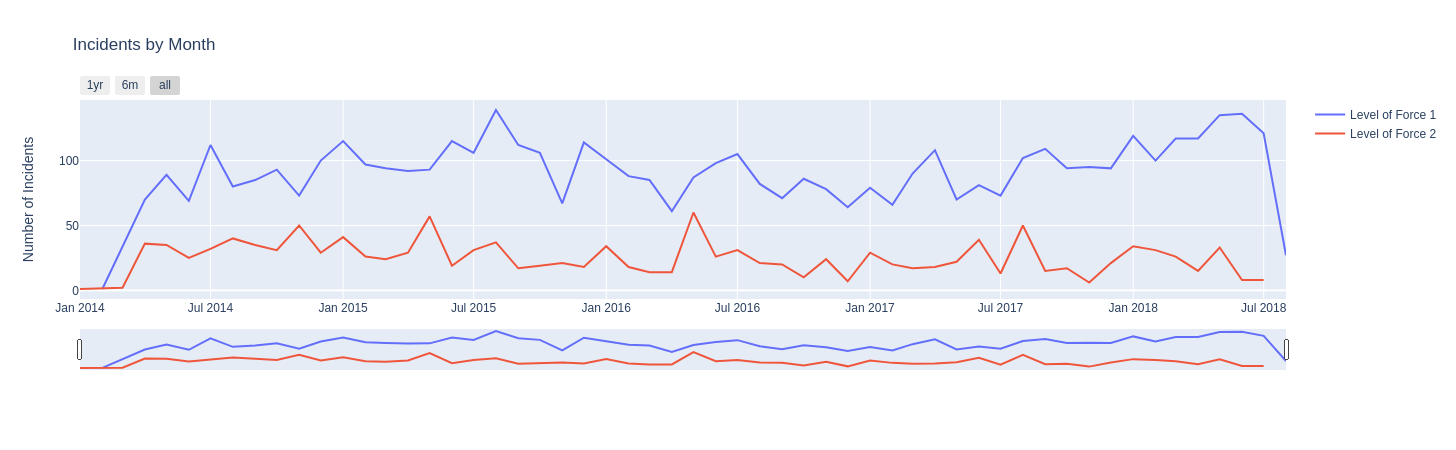

In [188]:
from sklearn.linear_model import LinearRegression

df_ts2 = level1.groupby('Year_month').count()['Year'].reset_index()
df_ts2.rename(columns={'Year_month': 'Data1', 'Year':'Incidents'}, inplace=True)

df_ts3 = level2.groupby('Year_month').count()['Year'].reset_index()
df_ts3.rename(columns={'Year_month': 'Data2', 'Year':'Incidents'}, inplace=True)




data = [
    go.Scatter(x = df_ts2.Data1, y = df_ts2['Incidents'], name='Level of Force 1'),
    go.Scatter(x = df_ts3.Data2, y = df_ts3['Incidents'], name='Level of Force 2'),
    
]

layout = dict(
    title='Incidents by Month',
    yaxis=dict(
    title='Number of Incidents'
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [189]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df3['Day of Week'] = df3['Day of Week'].map(dmap)

In [190]:
level1 = df3[df3['Level_of_Force'] == 1]
level2 = df3[df3['Level_of_Force'] == 2]
w1= level1['Day of Week'].value_counts().to_frame()
w2= level2['Day of Week'].value_counts().to_frame()
w3 = pd.merge(w1, w2, left_index=True, right_index=True)
w3 = w3.rename(columns = {'Day of Week_x': 'Level_Force1', 'Day of Week_y': 'Level_Force2'})
w3 = w3.reindex(['Mon','Tue','Wed', 'Fri','Thu', 'Sat', 'Sun'])
w3.head(8)

,Level_Force1,Level_Force2
Mon,665,186
Tue,728,181
Wed,696,189
Fri,740,207
Thu,680,161
Sat,720,213
Sun,732,219


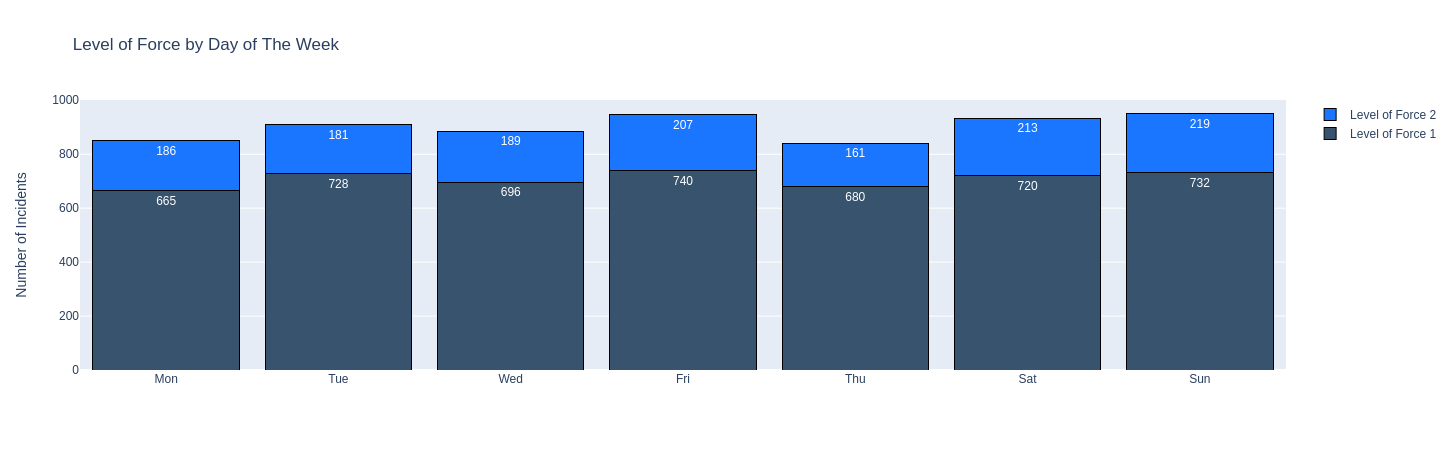

In [191]:
indice = w3.index

y1 = w3['Level_Force1']
y2 = w3['Level_Force2']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=indice,
    y=y1,
    name='Level of Force 1',
    marker=dict(color='rgb(55, 83, 109)', 
               line=dict(color='#000000', width=1)),
    #marker_color= 'rgb(55, 83, 109)',    
    text=y1,
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=indice,
    y= y2,
    name='Level of Force 2',
    marker=dict(color='rgb(26, 118, 255)', 
               line=dict(color='#000000', width=1)),
    #marker_color= 'rgb(26, 118, 255)',
    text=y2,
    textposition='auto',
    
))

fig.update_layout(
    title_text='Level of Force by Day of The Week', # title of plot
    yaxis_title_text='Number of Incidents', # yaxis label
    bargap=0.15, # gap between bars of adjacent location coordinates
    #bargroupgap=0.05 # gap between bars of the same location coordinates
)
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack', xaxis_tickangle=0)
fig.show()

In [192]:
h1= level1['Hour'].value_counts().to_frame()
h2= level2['Hour'].value_counts().to_frame()
h3 = pd.merge(h1, h2, left_index=True, right_index=True)
h3 = h3.rename(columns = {'Hour_x': 'Level_Force1', 'Hour_y': 'Level_Force2'})
h3.sort_index(ascending=False,inplace=True)
h3.head()

,Level_Force1,Level_Force2
23,289,53
22,323,86
21,322,85
20,324,96
19,211,82


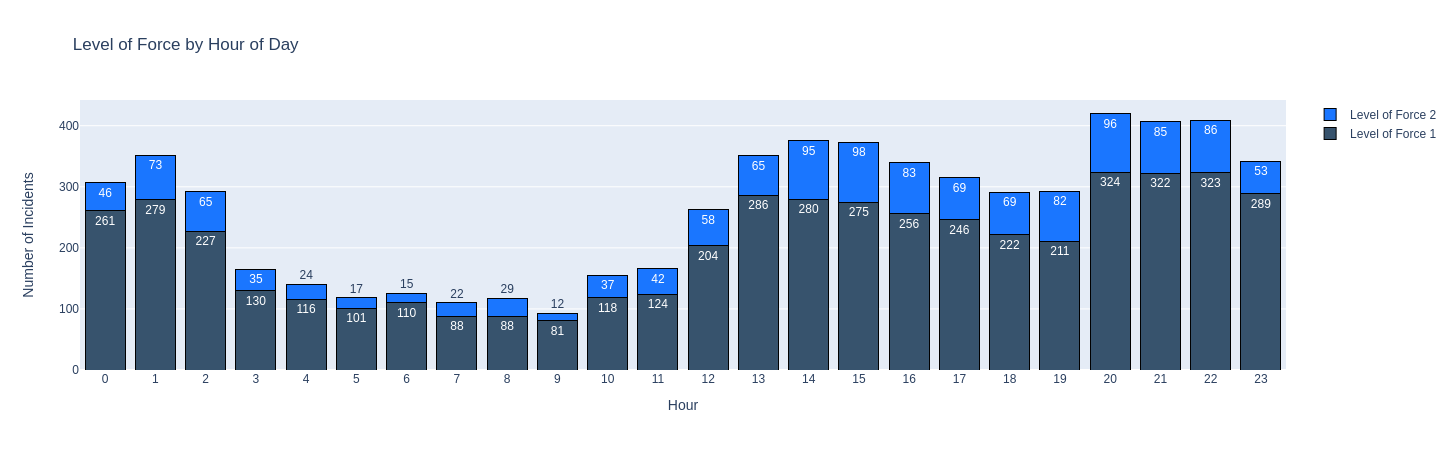

In [193]:
indice =  h3.index

y1 = h3['Level_Force1']
y2 = h3['Level_Force2']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=indice,
    y=y1,
    name='Level of Force 1',
    marker=dict(color='rgb(55, 83, 109)', 
               line=dict(color='#000000', width=1)),
    #marker_color= 'rgb(55, 83, 109)',    
    text=y1,
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=indice,
    y= y2,
    name='Level of Force 2',marker=dict(color='rgb(26, 118, 255)', 
               line=dict(color='#000000', width=1)), 
    #marker_color= 'rgb(26, 118, 255)',
    text=y2,
    textposition='auto',
    
))

fig.update_layout(
    title_text='Level of Force by Hour of Day', # title of plot
    #yaxis_title_text='Num_Incidents', # yaxis label
    #yaxis = {'title': f'{a}}, 
    #bargap=0.15, # gap between bars of adjacent location coordinates
    #bargroupgap=0.05 # gap between bars of the same location coordinates
    barmode='stack', 
    xaxis_tickangle=0, # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1,
        title='Hour'
    ),
    yaxis = dict(
        title='Number of Incidents'
    ),
)

fig.show()

In [194]:
df3['Precinct'].value_counts(dropna=False)

W      1576
N      1465
E      1103
S      1046
NaN     524
SW      361
X       242
Name: Precinct, dtype: int64

In [195]:
df3['Subject_Race'].value_counts(dropna=False)

White                            2656
Black or African American        2045
NaN                              1030
Hispanic or Latino                267
Asian                             214
American Indian/Alaska Native      69
Nat Hawaiian/Oth Pac Islander      36
Name: Subject_Race, dtype: int64

In [196]:
df3['Sector'].value_counts()

E     623
K     605
-     524
S     452
N     436
D     408
R     393
M     382
G     316
U     297
L     289
B     226
X     224
F     221
J     218
O     200
Q     181
C     164
W     140
99     18
Name: Sector, dtype: int64

In [197]:
print(len(df3['Beat'].value_counts()))
nbeats2 = df3['Beat'].value_counts(normalize=False,dropna=False).rename_axis('beat').to_frame('incidents')
nbeats1 = df3['Beat'].value_counts(normalize=True,dropna=False).rename_axis('beat').to_frame('%_incidents')
nbeats3 =pd.merge(nbeats1,nbeats2, on='beat')
nbeats3['%_incidents']= np.round(nbeats3['%_incidents'], decimals=4)*100
nbeats3.head()

53


,%_incidents,incidents
beat,,
NaN,8.30,524
E2,5.51,348
K2,3.75,237
N3,3.59,227
XX,3.55,224


In [198]:
import json
import geopandas as gpd

data = json.load(open('Seattle_Police_Beats_2018-Present.geojson'))

beats = gpd.GeoDataFrame.from_features(data,crs="epsg:4326")

In [199]:
nbeats3.columns= nbeats3.columns.str.strip().str.lower()

In [200]:
beatplus = pd.merge(beats, nbeats3, on='beat', how='inner')

In [201]:
beatplus.isnull().sum()

geometry          0
OBJECTID          0
beat              0
first_precinct    1
sector            0
shape_Length      0
shape_Area        0
%_incidents       0
incidents         0
dtype: int64

In [202]:
beatplus2 = beatplus.dropna(subset=['first_precinct'])

In [203]:
beatplus2.head()

,geometry,OBJECTID,beat,first_precinct,sector,shape_Length,shape_Area,%_incidents,incidents
1,"POLYGON ((-122.40539 47.67582, -122.40537 47.6...",2,B1,N,B,30766.975027,3.888917e+07,1.50,95
2,"POLYGON ((-122.36620 47.67598, -122.36654 47.6...",3,B2,N,B,32647.183464,5.514478e+07,1.06,67
3,"POLYGON ((-122.33800 47.66869, -122.33847 47.6...",4,B3,N,B,36973.284197,5.961233e+07,1.01,64
4,"POLYGON ((-122.31277 47.61415, -122.31277 47.6...",5,C1,E,C,37950.240898,3.255283e+07,0.97,61
5,"POLYGON ((-122.32340 47.61405, -122.32340 47.6...",6,E3,E,E,11240.846246,7.539737e+06,1.74,110


In [204]:
sectors = beatplus2.dissolve(by='sector', aggfunc='sum')
precincts = beatplus2.dissolve(by='first_precinct', aggfunc='sum')

In [205]:
precincts = precincts.reset_index()
precincts

,first_precinct,geometry,OBJECTID,shape_Length,shape_Area,%_incidents,incidents
0,E,"POLYGON ((-122.28430 47.60023, -122.28578 47.5...",179,210887.914929,2.252296e+08,17.46,1103
1,N,"POLYGON ((-122.30460 47.64741, -122.30517 47.6...",381,549987.526255,9.711400e+08,23.19,1466
2,S,"POLYGON ((-122.25930 47.52331, -122.25931 47.5...",357,385558.190478,5.095194e+08,16.54,1045
3,SW,"POLYGON ((-122.37140 47.51743, -122.37130 47.5...",194,304346.102109,5.470075e+08,5.70,361
4,W,"POLYGON ((-122.32037 47.59583, -122.32054 47.5...",375,282700.070915,3.903963e+08,24.95,1576


In [206]:
sectors = sectors.reset_index()
sectors.head()

,sector,geometry,OBJECTID,shape_Length,shape_Area,%_incidents,incidents
0,B,"POLYGON ((-122.34684 47.67598, -122.34684 47.6...",9,100387.442689,1.536463e+08,3.57,226
1,C,"POLYGON ((-122.27545 47.63725, -122.27576 47.6...",20,109451.377448,1.428575e+08,2.60,164
2,D,"POLYGON ((-122.34133 47.61383, -122.34137 47.6...",30,79103.973075,6.411141e+07,6.46,408
3,E,"POLYGON ((-122.32075 47.60722, -122.32142 47.6...",31,38778.373124,2.406831e+07,9.86,623
4,F,"POLYGON ((-122.35516 47.51736, -122.35651 47.5...",47,132229.840148,1.866851e+08,3.49,221


In [207]:
import folium
from folium.features import DivIcon
centro = [47.608013,-122.335167]
#1
# creating the map object
basemap = folium.Map(
    location=centro,
    tiles= 'cartodbpositron',
    zoom_start=11,
    min_zoom=10,
    max_zoom=13,
    width='90%', height='90%',
    
)
# plotting the choropleth

x1 = folium.Choropleth(
    geo_data=precincts,
    data=precincts,
    name='Precintcs',
    columns=['first_precinct','incidents'],
    key_on='feature.properties.first_precinct',
    fill_color= 'YlOrRd',
    fill_opacity=0.4,
    line_opacity=0.3,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    #legend_name='Incidents',
    highlight=True,
    #tooltip = tooltip
).add_to(basemap)

x1.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['first_precinct','incidents','%_incidents'],
    aliases=['Precinct', 'Incidents','%_incidents' ],          
 )
)

for key in x1._children:
    if key.startswith('color_map'):
        del(x1._children[key])

    
x2 = folium.Choropleth(
    geo_data=sectors,
    data=sectors,
    name='Sectors',
    columns=['sector','incidents'],
    key_on='feature.properties.sector',
    fill_color= 'YlOrRd',
    fill_opacity=0.4,
    line_opacity=0.3,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    
    highlight=True,
    #tooltip = tooltip
).add_to(basemap)


for key in x2._children:
    if key.startswith('color_map'):
        del(x2._children[key])


x2.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['sector','incidents','%_incidents'],
    aliases=['Sector', 'Incidents','%_incidents' ],          
 )
)

x3 = folium.Choropleth(
    geo_data=beatplus2,
    data=beatplus2,
    name='Beats',
    columns=['beat','incidents'],
    key_on='feature.properties.beat',
    fill_color= 'YlOrRd',
    fill_opacity=0.4,
    line_opacity=0.3,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    legend_name='Incidents', 
    highlight=True,
    #tooltip = tooltip
).add_to(basemap)


x3.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['first_precinct','sector','beat','incidents','%_incidents'],
    aliases=['Precinct','Sector', 'Beat', 'Incidents','%_incidents' ],          
 )
)

folium.LayerControl().add_to(basemap)

basemap

In [208]:
df3['Subject_Gender'].value_counts(dropna=False, normalize=True).to_frame()

,Subject_Gender
Male,0.774735
Female,0.207060
NaN,0.018205


In [209]:
males = df3[df3['Subject_Gender'] == 'Male']
females = df3[df3['Subject_Gender'] == 'Female']

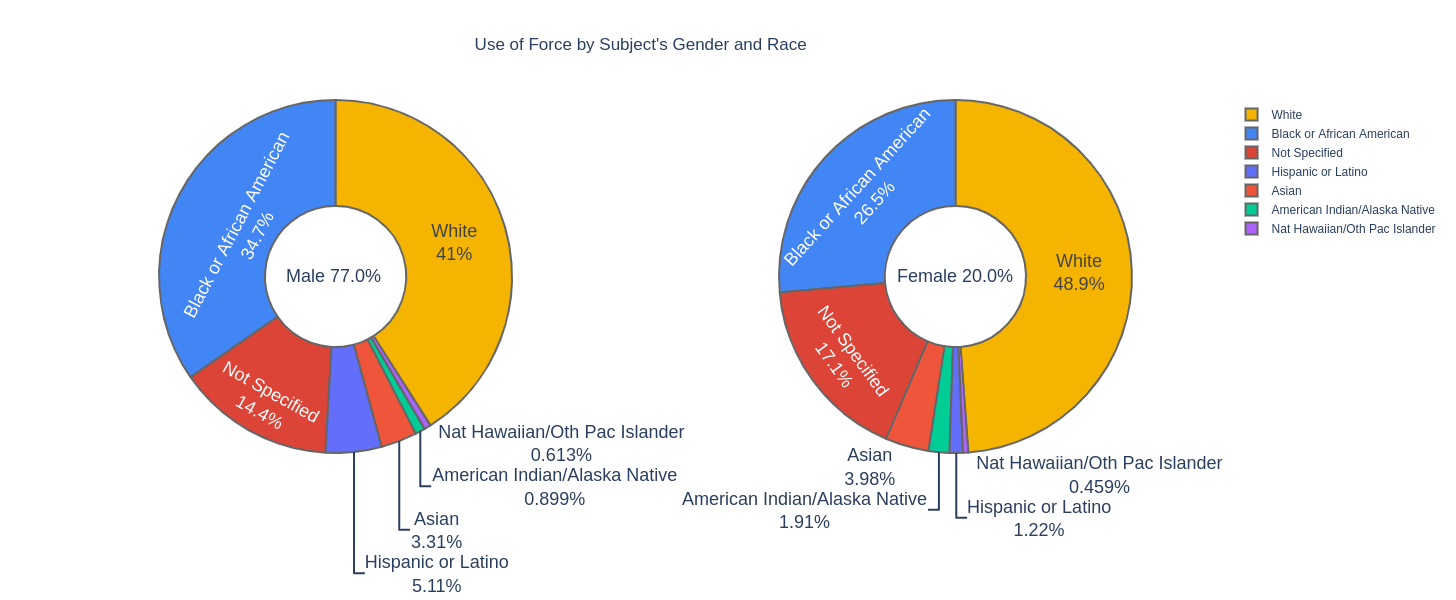

In [210]:
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot  as plt

#Define Labels and Values

labels1 = males['Subject_Race'].value_counts(dropna=False).index.to_frame()
values1 = males['Subject_Race'].value_counts(dropna=False).values

#labels1[0] = labels1[0].fillna('Not Specified')
labels1 = labels1.fillna('Not Specified')


labels2 = females['Subject_Race'].value_counts(dropna=False).index.to_frame()
values2 = females['Subject_Race'].value_counts(dropna=False).values

labels2 = labels2.fillna('Not Specified')

values3 = df['Subject_Gender'].value_counts(dropna= False,normalize=True).values.round(2)
values3= values3.round(3)*100

# Define color sets of paintings
colors = ['rgb(244, 180, 0)', 'rgb(66, 133, 244)',  'rgb(219, 68, 55)']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=['Male', 'Female'])

# Define pie charts
fig.add_trace(go.Pie(labels=labels1, values=values1, name='Male',
               #marker_colors=colors,
               #marker={'color': values1,'colorscale': 'Portland', 'reversescale': False}, 
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
               line=dict(color='rgb(101,101,101)', width=2))), 1, 1)

fig.add_trace(go.Pie(labels=labels2, values=values2, name='Female',
               marker_colors=colors,
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
               line=dict(color='rgb(101,101,101)', width=2))), 1, 2)




# Tune layout and hover info
fig.update_layout(height=600,  
                  title_x=0.44,
                  annotations=[dict(text=f'Male {values3[0]}%', x=0.224, y=0.47, font_size=18, showarrow=False),
                             dict(text=f'Female {values3[1]}%', x=0.775, y=0.47, font_size=18, showarrow=False)])
fig.update_traces(textposition='auto', textinfo='percent+label', hoverinfo='label+percent+name',hole=.4)

fig.update(layout_title_text="Use of Force by Subject's Gender and Race", layout_showlegend=True)


fig = go.Figure(fig)

fig.show()

## Machine Learning

In [211]:
df['Subject_Gender'] = df['Subject_Gender'].str.strip()
def func(x):
    if x == 'Male':
        return 1
    elif x == 'Female':
        return 0
    else:
        pass

df['Subject_Gender'] = df['Subject_Gender'].apply(func)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Incident_Num                    8061 non-null   int64         
 1   Num_subjects_involved           8061 non-null   int64         
 2   Level_of_Force                  8061 non-null   int64         
 3   Occured_date_time               8061 non-null   datetime64[ns]
 4   Precinct                        7454 non-null   object        
 5   Sector                          8061 non-null   object        
 6   Beat                            7454 non-null   object        
 7   Officer_ID                      8061 non-null   int64         
 8   Subject_ID                      8061 non-null   int64         
 9   Subject_Race                    6730 non-null   object        
 10  Subject_Gender                  7866 non-null   float64       
 11  Hour

In [213]:
df.head()

,Incident_Num,Num_subjects_involved,Level_of_Force,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,Hour,Month,Year,Day of Week,Year_month,Num_Incidents_Officer_involved,Num_Incidents_Subject_involved,Same_Officer_Subject
0,18412,1,1,2017-11-28 01:40:00,NaN,-,NaN,2238,14470,Black or African American,0.0,1,11,2017,1,2017-11,9,1,0
1,16162,1,1,2017-06-22 04:15:00,NaN,-,NaN,1589,12833,Black or African American,1.0,4,6,2017,3,2017-06,4,6,0
2,15041,1,1,2017-03-30 15:59:00,NaN,-,NaN,2017,12130,White,1.0,15,3,2017,3,2017-03,21,1,0
3,29139,1,1,2018-02-15 13:06:00,NaN,-,NaN,4759,15571,Black or African American,1.0,13,2,2018,3,2018-02,5,5,1
4,30425,1,1,2018-07-17 21:00:00,NaN,-,NaN,4745,16299,White,0.0,21,7,2018,1,2018-07,2,8,1


In [214]:
df.isnull().sum()

Incident_Num                         0
Num_subjects_involved                0
Level_of_Force                       0
Occured_date_time                    0
Precinct                           607
Sector                               0
Beat                               607
Officer_ID                           0
Subject_ID                           0
Subject_Race                      1331
Subject_Gender                     195
Hour                                 0
Month                                0
Year                                 0
Day of Week                          0
Year_month                           0
Num_Incidents_Officer_involved       0
Num_Incidents_Subject_involved       0
Same_Officer_Subject                 0
dtype: int64

In [215]:
dft = df.drop(['Incident_Num','Occured_date_time','Beat','Subject_ID','Num_Incidents_Officer_involved','Num_Incidents_Subject_involved','Year_month'], axis=1)
dft.head()

,Num_subjects_involved,Level_of_Force,Precinct,Sector,Officer_ID,Subject_Race,Subject_Gender,Hour,Month,Year,Day of Week,Same_Officer_Subject
0,1,1,NaN,-,2238,Black or African American,0.0,1,11,2017,1,0
1,1,1,NaN,-,1589,Black or African American,1.0,4,6,2017,3,0
2,1,1,NaN,-,2017,White,1.0,15,3,2017,3,0
3,1,1,NaN,-,4759,Black or African American,1.0,13,2,2018,3,1
4,1,1,NaN,-,4745,White,0.0,21,7,2018,1,1


In [216]:
dft = dft.dropna()

In [217]:
dft = pd.get_dummies(dft, columns=['Precinct', 'Sector', 'Subject_Race'], drop_first=True)
dft.head()

,Num_subjects_involved,Level_of_Force,Officer_ID,Subject_Gender,Hour,Month,Year,Day of Week,Same_Officer_Subject,Precinct_N,...,Sector_R,Sector_S,Sector_U,Sector_W,Sector_X,Subject_Race_Asian,Subject_Race_Black or African American,Subject_Race_Hispanic or Latino,Subject_Race_Nat Hawaiian/Oth Pac Islander,Subject_Race_White
17,1,1,1741,1.0,6,7,2016,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18,1,1,1840,0.0,16,7,2016,3,0,0,...,0,0,0,0,0,0,0,0,0,1
20,1,2,1065,1.0,19,5,2016,6,0,0,...,0,0,0,0,0,0,0,0,0,1
22,1,2,709,1.0,19,5,2016,6,0,0,...,0,0,0,0,0,0,0,0,0,1
32,2,2,1180,1.0,19,5,2016,6,0,0,...,0,0,0,0,0,0,0,0,0,1


In [218]:
y = dft['Level_of_Force']
x = dft.drop('Level_of_Force', axis = 1)

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Now is time to choose our Classifiers.

There are a multitude of options for classification. In general, there is no single “best” option for all situations. That said, three popular classification methods - Decision Trees, k-NN and Naive Bayes - can be improved for virtually any situation.

In [220]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

PROS : Decision Trees are very flexible. So if you are trying to predict a categorical value like (red, green, up, down) or if you are trying to predict a continuous value like 2.9, 3.4 etc Decision Trees will handle both problems. Probably one of the coolest things about Decision Trees is they only need a table of data and they will build a classifier directly from that data without needing any up front design work to take place. To some degree properties that don't matter won't be chosen as splits and will get eventually pruned so it's very tolerant of nonsense. To start it's set it and forget it.

CONS: However, the downside. Simple decision trees tend to over fit the training data more so that other techniques which means you generally have to do tree pruning and tune the pruning procedures. You didn't have any upfront design cost, but you'll pay that back on tuning the trees performance.

In [221]:
model1 = ExtraTreesClassifier() 
model2 = RandomForestClassifier()

PROS : Bayes can perform quite well, and it doesn't over fit nearly as much so there is no need to prune or process the data. Also is much Faster.
       
CONS : Naive Bayes requires you build a classification by hand. There's not way to just toss a bunch of tabular data at it and have it pick the best features it will use to classify. Picking which features matter is up to you. Decisions trees will pick the best features for you from tabular data. If there were a way for Naive Bayes to pick features you'd be getting close to using the same techniques that make decision trees work like that. 

In [222]:
model3 = GaussianNB()

If you are deciding between using decision trees vs naive bayes to solve a problem often times it best to test each one. Build a decision tree and build a naive bayes classifier then have a shoot out using the training and validation data you have. Which ever performs best will more likely perform better in the field. And it's always a good idea to cast each of those against K-nearest neighbor (KNN) predictors because k-nearest has been shown to out perform both of them in some situations, and KNN is a simple algorithm to implement and use. If KNN performs better than the other two go with it.

In [223]:
model4 = KNeighborsClassifier(n_neighbors=10)

In [224]:
%%time
model1.fit(x_train, y_train)

CPU times: user 732 ms, sys: 12 ms, total: 744 ms
Wall time: 744 ms


ExtraTreesClassifier()

In [225]:
%%time
model2.fit(x_train, y_train)

CPU times: user 775 ms, sys: 7.99 ms, total: 783 ms
Wall time: 784 ms


RandomForestClassifier()

In [226]:
%%time
model3.fit(x_train, y_train)

CPU times: user 8.95 ms, sys: 0 ns, total: 8.95 ms
Wall time: 7.86 ms


GaussianNB()

In [227]:
%%time
model4.fit(x_train, y_train)

CPU times: user 28.3 ms, sys: 15 µs, total: 28.3 ms
Wall time: 27.2 ms


KNeighborsClassifier(n_neighbors=10)

In [228]:
result1 = model1.score(x_test, y_test)
result2 = model2.score(x_test, y_test)
result3 = model3.score(x_test, y_test)
result4 = model4.score(x_test, y_test)
print(f'ExtraTreesClassifier accuracy: {result1}')
print(f'RandomForestClassifier accuracy: {result2}')
print(f'NaiveBayesClassifier accuracy: {result3}')
print(f'KNNClassifier accuracy: {result4}')

ExtraTreesClassifier accuracy: 0.8697277095568606
RandomForestClassifier accuracy: 0.8478376935397758
NaiveBayesClassifier accuracy: 0.5888948211425521
KNNClassifier accuracy: 0.7469300587293113


In our case, models based on Decisions Trees took substantially more time to be fitted but out performed by  much the two other models tested in accuracy. 

In [229]:
%%time
pred1 = model1.predict(x_test)

CPU times: user 79.1 ms, sys: 0 ns, total: 79.1 ms
Wall time: 78.6 ms


In [230]:
%%time
pred2 = model2.predict(x_test)

CPU times: user 49.8 ms, sys: 3.91 ms, total: 53.7 ms
Wall time: 52.4 ms


In [231]:
%%time
pred3 = model3.predict(x_test)

CPU times: user 2.1 ms, sys: 3.93 ms, total: 6.03 ms
Wall time: 5.4 ms


In [232]:
%%time
pred4 = model4.predict(x_test)

CPU times: user 159 ms, sys: 6 µs, total: 159 ms
Wall time: 158 ms


In [233]:
from sklearn.metrics import classification_report, confusion_matrix
print('ExtraTrees')
print(classification_report(y_test,pred1))
print('RandomForest')
print(classification_report(y_test,pred2))
print('NaiveBayes')
print(classification_report(y_test,pred3))
print('Knn')
print(classification_report(y_test,pred4))

ExtraTrees
              precision    recall  f1-score   support

           1       0.89      0.94      0.92      1411
           2       0.78      0.66      0.71       462

    accuracy                           0.87      1873
   macro avg       0.84      0.80      0.82      1873
weighted avg       0.87      0.87      0.87      1873

RandomForest
              precision    recall  f1-score   support

           1       0.86      0.95      0.90      1411
           2       0.79      0.52      0.63       462

    accuracy                           0.85      1873
   macro avg       0.82      0.74      0.77      1873
weighted avg       0.84      0.85      0.84      1873

NaiveBayes
              precision    recall  f1-score   support

           1       0.80      0.60      0.69      1411
           2       0.31      0.55      0.40       462

    accuracy                           0.59      1873
   macro avg       0.56      0.58      0.54      1873
weighted avg       0.68      0.59      

In [234]:
print('ExtraTrees')
print(confusion_matrix(y_test,pred1))
print('\n')
print('RandomForest')
print(confusion_matrix(y_test,pred2))
print('\n')
print('NaiveBayes')
print(confusion_matrix(y_test,pred3))
print('\n')
print('NaiveBayes')
print(confusion_matrix(y_test,pred4))

ExtraTrees
[[1323   88]
 [ 156  306]]


RandomForest
[[1347   64]
 [ 221  241]]


NaiveBayes
[[848 563]
 [207 255]]


NaiveBayes
[[1377   34]
 [ 440   22]]
